<a href="https://colab.research.google.com/github/Bertoncini/AluraQuarentenaDados/blob/master/02_Desafio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [0]:
import pandas as pd
filmes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/ratings.csv')

In [0]:
filmes.columns = ['filmeId','titulo','generos']
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

In [0]:
avaliacoes_media_filme = avaliacoes.groupby('filmeId')['nota'].mean().round(2)

In [0]:
filmes_media = filmes.join(avaliacoes_media_filme,"filmeId").rename(columns={'nota':'notaMedia'})

In [0]:
total_avaliacao_filme = avaliacoes.groupby('filmeId')['nota'].count()

In [0]:
filmes_media_total = filmes_media.join(total_avaliacao_filme,'filmeId').rename(columns={'nota':'qtdNota'})

In [0]:
generos = filmes_media_total['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

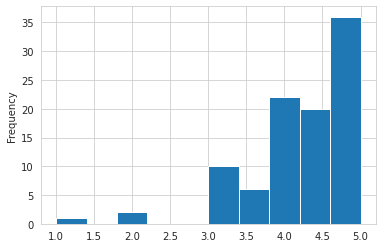

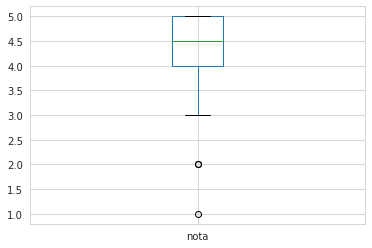

count    97.000000
mean      4.268041
std       0.807071
min       1.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [103]:
plot_filme(750)

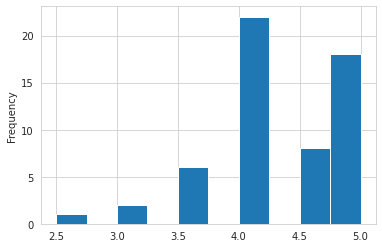

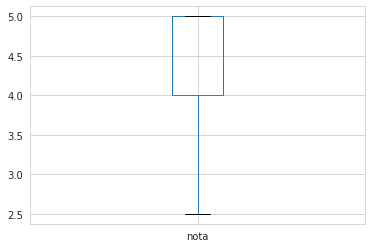

count    57.000000
mean      4.271930
std       0.620125
min       2.500000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [104]:
plot_filme(1276)

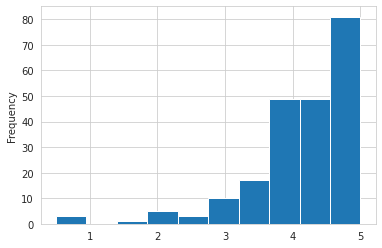

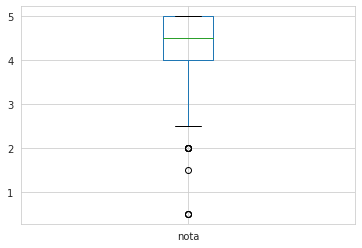

count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [105]:
plot_filme(2959)

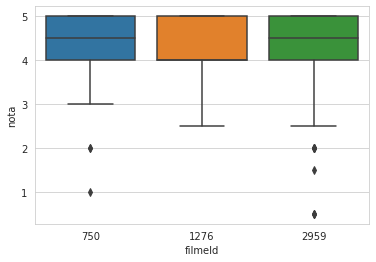

In [107]:
sns.boxplot(data = avaliacoes.query("filmeId in [750,1276,2959]"), x ="filmeId", y="nota")
plt.show()

In [101]:
filmes_media_total.query('qtdNota>50').sort_values('notaMedia',ascending=False).head()

,filmeId,titulo,generos,notaMedia,qtdNota
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.29,192.0
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.27,97.0
975,1276,Cool Hand Luke (1967),Drama,4.27,57.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.27,218.0
